| <p style="text-align: left;">Name</p>               | <p style="text-align: right;">Date</p> |
| ---------------------------------------------------| ------------------------------------- |
| <p style="text-align: left">Diaaeldin SHALABY</p>   | 18.06.2021                            |

<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 7 &mdash; Introduction to Reinforcement Learning (Assignment)</h2>

<b>Authors:</b> B. Schäfl, S. Lehner, J. Brandstetter<br>
<b>Date:</b> 11-06-2021

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2>Table of contents</h2>
<ol>
    <a href="#exercise-reinforcement-learning-environment"><li style="font-size:large;font-weight:bold">Dissection of an Environment</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-reinforcement-learning-one"><li style="font-size:medium">States and actions</li></a>
    </ol>
    <a href="#exercise-reinforcement-learning-random"><li style="font-size:large;font-weight:bold">Tackling the Environment with Random Exploration</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-reinforcement-learning-two"><li style="font-size:medium">Implementing random search</li></a>
        <a href="#exercise-reinforcement-learning-three"><li style="font-size:medium">The problem with random search</li></a>
    </ol>
        <a href="#exercise-reinforcement-learning-qlearning"><li style="font-size:large;font-weight:bold">Tackling the Environment with $Q$-Learning</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-reinforcement-learning-four"><li style="font-size:medium">First approach of learning a $Q$-table</li></a>
        <a href="#exercise-reinforcement-learning-five"><li style="font-size:medium">The problem with missing exploration</li></a>
        <a href="#exercise-reinforcement-learning-six"><li style="font-size:medium">Evaluate the agent's performance</li></a>
        <a href="#exercise-reinforcement-learning-seven"><li style="font-size:medium">The role of randomness in the environment</li></a>
    </ol>
</ol>

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>
This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u7_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u7_utils.py</code> need to be installed.

In [1]:
# Import pre-defined utilities specific to this notebook.
import u7_utils as u7

# Import additional utilities needed in this notebook.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import time

from IPython import display
from typing import Any, Dict, Tuple

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u7.setup_jupyter()

<h3 style="color:rgb(0,120,170)">Module versions</h3>
As mentioned in the introductory slides, specific minimum versions of Python itself as well as of used modules is recommended.

In [2]:
u7.check_module_versions()

Installed Python version: 3.8 (✓)
Installed numpy version: 1.19.1 (✓)
Installed pandas version: 1.1.3 (✓)
Installed PyTorch version: 1.7.1 (✓)
Installed scikit-learn version: 0.23.2 (✓)
Installed scipy version: 1.5.0 (✓)
Installed matplotlib version: 3.3.1 (✓)
Installed seaborn version: 0.11.0 (✓)
Installed PIL version: 8.0.0 (✓)
Installed rdkit version: 2020.09.1 (✓)
Installed gym version: 0.18.3 (✓)


<a name="exercise-reinforcement-learning-environment"></a><h2>Dissection of an Environment</h2>
<p>All exercises in this assignment are referring to the <i>FrozenLake-v0</i> environment of <a href="https://gym.openai.com"><i>OpenAI Gym</i></a>. This environment is descibed according to its official <a href="https://gym.openai.com/envs/FrozenLake-v0/">OpenAI Gym website</a> as follows:
<center>
    <cite>Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly <span style="color:rgb(0,255,0)">frozen</span>, but there are a few <span style="color:rgb(255,0,0)">holes</span> where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the <span style="color:rgb(255,0,255)">disc</span>. However, the ice is slippery, so you won't always move in the direction you intend.</cite>
    </center></p>


<p>There are <i>four</i> types of surfaces described in this environment:
<ul>
    <li><code>S</code> $\rightarrow$ starting point (<span style="color:rgb(0,255,0)"><i>safe</i></span>)</li>
    <li><code>F</code> $\rightarrow$ frozen surface (<span style="color:rgb(0,255,0)"><i>safe</i></span>)</li>
    <li><code>H</code> $\rightarrow$ hole (<span style="color:rgb(255,0,0)"><i>fall to your doom</i></span>)</li>
    <li><code>G</code> $\rightarrow$ goal (<span style="color:rgb(255,0,255)"><i>frisbee location</i></span>)</li>
</ul>


If not already done, more information on how to <i>install</i> and <i>import</i> the <code>gym</code> module is available in the lecture's notebook.</p>

<a name="exercise-reinforcement-learning-one"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Create a new instance of <tt>FrozenLakeEnv</tt> with the seed set to <tt>42</tt> and render the current state in a human-readable way.</li>
        <li>Gather and print the amount of different <i>actions</i> as well as <i>states</i> of the <tt>FrozenLakeEnv</tt> instance. Discuss the results.</li>
        <li>Display the <i>reward table entry</i> for the current state. Discuss the different elements of the resulting dictionary.</li>
    </ul>
</div>

In [62]:
enviroment_lake = u7.FrozenLakeEnv()
u7.set_environment_seed(environment=enviroment_lake, seed=42)

In [63]:
enviroment_lake.render(mode=r'human')
current_state_id = enviroment_lake.s
print(f'Current state ID: {current_state_id}')


SFFF
FHFH
FFFH
HFFG
Current state ID: 0


<p>The first and na&#xEF;ve approach to solve this task is by simply <i>brute forcing</i> it applying <i>random search</i>. The outline of this approach is the following:
<table style="text-align:center;vertical-align:middle">
    <tr>
        <th style="width:75px">Step</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>0</td>
        <td>Choose a random <i>action</i> with respect to the <i>current</i> state.</td>
    </tr>
    <tr>
        <td>1</td>
        <td>Execute previously chosen <i>action</i> and transition into a <i>new</i> state.</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Repeat the previous steps as long as the current episode is still ongoing.</td>
    </tr>
</table>

For such an approach to be at least remotely applicable, the number of possible <i>actions</i> and <i>states</i> is of utter importance. Otherwise, we are lost in the depth of combinatorial explosion. The property <code>n</code> of the <code>action_space</code> and <code>observation_space</code> of the respective environment gives the amount of <i>actions</i> as well as <i>states</i>.</p>

In [64]:
num_actions = enviroment_lake.action_space.n
num_states = enviroment_lake.observation_space.n
print(f'The FrozenLake-v0 environment comprises <{num_actions}> actions and <{num_states}> states.')

The FrozenLake-v0 environment comprises <4> actions and <16> states.


In [65]:
current_state_id = enviroment_lake.s
enviroment_lake.P[current_state_id]

{0: [(0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 4, 0.0, False)],
 1: [(0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 4, 0.0, False),
  (0.3333333333333333, 1, 0.0, False)],
 2: [(0.3333333333333333, 4, 0.0, False),
  (0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False)],
 3: [(0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 0, 0.0, False)]}

<p>Each entry of the <i>reward table</i> contains a dictionary of the form <code>s: {a: [] for a in range(nA)} for s in range(nS)</code>.
<table style="text-align:center;vertical-align:middle">
    <tr>
        <th style="width:75px">Element</th>
        <th>Description</th>
    </tr>
    <tr>
        <td><code>nS=nrows*ncols</code></td>
        <td>The number of possible moves.</td>
    </tr>
    <tr>
        <td><code>nA=4</code></td>
        <td>Number of surfaces. [S,F,H,G]</td>
    </tr>
    <tr>
        <td><code>a</code></td>
        <td>Potential state based on the surface of the next move.</td>
    </tr>
</table></p>

<a name="exercise-reinforcement-learning-random"></a><h2>Tackling the Environment with Random Exploration</h2>
<p>Previously, we talked about solving this task in a na&#xEF;ve way by simply applying <i>brute force</i>: using <i>random search</i>. In the meantime we analyzed the <i>action</i> as well as the <i>state space</i> and came to the conclusion, that such an approach is more than feasible. To repeat the outline of such an approach:
<ul>
    <li><code>I</code> $\rightarrow$ choose a random <i>action</i> with respect to the <i>current</i> state.</li>
    <li><code>II</code> $\rightarrow$ execute previously chosen <i>action</i> and transition into a <i>new</i> state.</li>
    <li><code>III</code> $\rightarrow$ if the episode is finished, but the goal not reached, <i>reset</i> the position of the <i>disc retrieving entity</i>.</li>
</ul>

This procedure is repeated as long as the task is not solved or a defined maximum of steps is reached, whatever triggers first (<code>IV</code>). Adapt the function <code>apply_random_search</code> as discussed during the lecture. Mark the corresponding sections of the code using <code>I</code>, <code>II</code>, <code>III</code> and <code>IV</code>. Note that our <i>random search</i> is <i>not</i> guaranteed to find  the solution of a task in <i>finite time</i>, hence an upper border on the <i>runtime</i> is often applied as a safety net (in our case the <i>number of allowed steps</i>).</p>

<a name="exercise-reinforcement-learning-two"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Implement the <i>random search</i> algorithm as outlined above (equivalently to the one discussed during the exercise).</li>
        <li>Apply your random search implementation on a freshly seeded <tt>FrozenLakeEnv</tt> instance, with an animation delay of $0.1$.</li>
        <li>How many steps are necessary to reach the goal at least once and how often did an involuntary dive happen?</li>
    </ul>
</div>

In [81]:
def apply_random_search(environment: u7.FrozenLakeEnv, animate: bool = False,
                        delay: float = 0.01, max_steps: int = 1000) -> Tuple[int, int, Dict[str, Any]]:
    """
    Solve specified environment by applying random search.
    
    :param environment: the environment on which to apply random search
    :param animate: animate the random search process
    :param delay: the minimum delay in milliseconds between each rendered frame (ignored if not animated)
    :param max_steps: maximum amount of steps to perform
    :return: amount of steps performed, involuntary dives and captured frames
    """
    num_steps, num_penalties, final_reward, captured_frames = 0, 0, 0, []

    # <III>: repeat random search procedure as long as the episode is still ongoing.
    
    u7.set_environment_seed(environment=enviroment_lake, seed=42)
    
    done = False
    while not done:
        if num_steps == max_steps:
            break

        # <I>: choose a random action with respect to the current state.
        current_action = environment.action_space.sample()

        # <II>: execute previously chosen action and transition into a new state.
        current_state, current_reward, done, info = environment.step(current_action)

        # Update counter for inflicted penalties.
        final_reward += current_reward
        if current_reward <= 0:
            num_penalties += 1
        num_steps += 1
        

        # Save rendering of current state.
        captured_frames.append({
            r'frame': environment.render(mode=r'ansi'),
            r'state': current_state,
            r'action': current_action,
            r'reward': current_reward
        })
        
        # Optionally display current state.
        if animate:
            display.clear_output(wait=True)
            print(captured_frames[-1][r'frame'])
            print(f'Step No.: {num_steps}'
                  f'\nState ID: {current_state}'
                  f'\nAction ID: {current_action}'
                  f'\nReward: {current_reward}')
            time.sleep(delay)
        
        if not done and current_reward == 0:
            enviroment_lake.reset()
            
    return num_steps, num_penalties, final_reward, captured_frames

In [82]:
u7.set_environment_seed(environment=enviroment_lake, seed=42)
num_steps, num_penalties, final_reward, _ = apply_random_search(
    environment=enviroment_lake,
    animate=True,
    delay=0.1
)

  (Right)
SFFF
FHFH
FFFH
HFFG

Step No.: 1000
State ID: 1
Action ID: 2
Reward: 0.0


Unfortunatly the function did not find a solution.

<p>To drill down on the drawbacks of plain <i>random search</i>, we are designing the following experimental setup (hint: it is actually the same experimental setup as already discussed during the exercise, so you might orient yourself on the implementation presented during class):
<ul>
    <li>Repeat the previous <i>random search</i> procedure a specified amount of times.</li>
    <li>Aggregate the results of each run for later analysis.</li>
    <li>Visualise the aggegrated results using <i>box-</i> and <i>swarm-plots</i>.</li>
</ul>
Once again, we are setting the <i>random seed</i>, but take care of setting it <i>outside</i> the loop, otherwise the same result is reported with each iteration (and an aggregation of the results would not give us any more insights).</p>

<a name="exercise-reinforcement-learning-three"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Conduct a <i>random search experiment</i> as outlined above, using $100$ repetitions and the random seed set to $42$.</li>
        <li>Interpret the visualization (e.g. the span of the boxes) and keep the scaling of the <i>x-axis</i> in mind.</li>
        <li>In comparison with the <tt>Taxi-v3</tt> environment, what might be the problem with <tt>FrozenLakeEnv</tt> w.r.t. random exploration?</li>
    </ul>
</div>

In [83]:
u7.set_environment_seed(environment=enviroment_lake, seed=42)
num_steps_total, num_penalties_total, final_reward_total = [], [], []
num_repetitions = 100

# Collect information over multiple repetitions.
for repetition in range(num_repetitions):
    enviroment_lake.reset()
    num_steps, num_penalties, final_reward, _ = apply_random_search(environment=enviroment_lake)
    num_steps_total.append(num_steps)
    num_penalties_total.append(num_penalties)
    final_reward_total.append(final_reward)

# Combine collected information to a data frame for further downstream analysis.
collected_experiment_info = pd.DataFrame(zip(
    num_steps_total, num_penalties_total, final_reward_total
), columns=(r'Steps performed', r'Penalties inflicted', r'Final reward'))

C:\Users\cadmo\miniconda3\envs\hoai2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


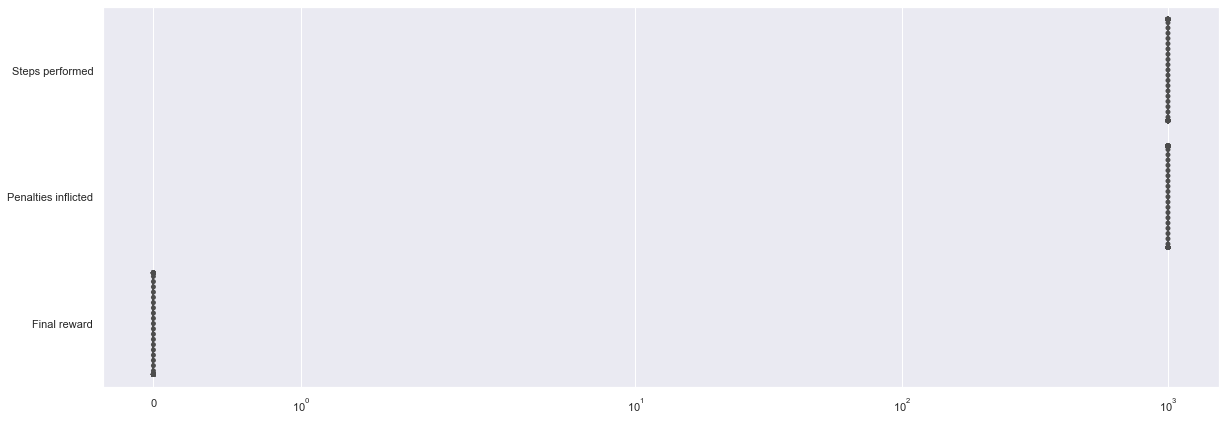

In [84]:
# Set default plotting style.
sns.set()

# Visualize aggregated results of the random search procedure.
fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=False, figsize=(20, 7))
ax[0, 0].set_xscale(r'symlog')
_ = sns.boxplot(data=collected_experiment_info, ax=ax[0, 0], orient=r'h')
_ = sns.swarmplot(data=collected_experiment_info, ax=ax[0, 0], color=r'0.3', orient=r'h')

<a name="exercise-reinforcement-learning-qlearning"></a><h2>Tackling the Environment with $Q$-Learning</h2>
<p>In a simplified version of $Q$-learning, the <b>$\boldsymbol{Q}$-value</b>
\begin{equation}
    Q(s,a)
\end{equation}</p>

<p>is the expected future reward of being in state $s$ and taking action $a$. Intuitively, if the the $Q$-values are learned correctly, a good policy would be to take the action which maximizes the expected future reward. This is what $Q$-learning is doing. $Q$-learning lets the agent use the environment's rewards to learn, over time, the best action to take in a given state. $Q$-values are initialized to an arbitrary value, and as the agent exposes itself to the environment and receives different rewards by executing different actions, the $Q$-values are updated using the equation:
\begin{equation}
    Q(s_t,a_t) \leftarrow (1 - \alpha) \cdot Q(s_t,a_t) + \alpha \cdot \left( r + \max_{a_{t+1}} Q(s_{t+1}, a_{t+1})\right)
\end{equation}</p>

<p>We are assigning $\leftarrow$, or updating, the $Q$-value of the agent's current state and action, denoted as $Q(s_t,a_t)$ with $\alpha$ as the learning rate, i.e the extent to which our $Q$-values are being updated in every iteration.</p>

<p>The <b>$\boldsymbol{Q}$-table</b> is a matrix where we have a row for every state and a column for every action – $500$ and $6$, respectively, when referring to the <i>Taxi-v3</i> example, as discussed during class. It's first initialized to $0$, and then values are updated after training.</p>

<p>Previously, we talked about solving this task in a na&#xEF;ve way by simply applying <i>brute force</i>: using <i>random search</i>. This time we want to apply a more sophisticated algorithm – $Q$-learning:
<ul>
    <li><code>I</code> $\rightarrow$ Choose action $a_t$.
    <li><code>II</code> $\rightarrow$ Go from state $s_t$ to state $s_{t+1}$ by taking action $a_{t}$.
    <li><code>III</code> $\rightarrow$ For all possible $Q$-values from the state $s_{t+1}$, select the highest.
    <li><code>IV</code> $\rightarrow$ Update $Q$-table values using the equation from above.
    <li><code>V</code> $\rightarrow$ Set the next state as the current state.
</ul>

This procedure is repeated for as many episodes as specified (<code>VI</code>).</p>

<a name="exercise-reinforcement-learning-four"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Implement <i>$Q$-learning</i> as outlined above (equivalently to the one discussed during the exercise).</li>
        <li>Apply $Q$-learning on a freshly seeded <tt>FrozenLakeEnv</tt> instance for $10^4$ episodes, with $10^3$ delay steps and $\alpha{}=0.1$.</li>
        <li>Interpret the visualization of the resulting $Q$-table. What do you observe?</li>
    </ul>
</div>

<div class="alert alert-warning">
    The following code snippet is taken from the accompanying exercise notebook. You do not need to modify it for this assignment.
</div>

In [85]:
def visualize_q_table(q_table: np.ndarray, title: str = r'') -> None:
    """
    Visualize Q-table using a heatmap plot.
    
    :param q_table: Q-table to visualize
    :return: None
    """
    sns.set()
    fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=False, figsize=(20, 7))
    _ = sns.heatmap(data=q_table, ax=ax[0, 0])
    _ = ax[0, 0].set(xlabel=r'Action', ylabel=r'State', title=title)
    display.clear_output(wait=True)
    display.display(fig)
    plt.close(fig=fig)


def apply_q_learning(environment: u7.FrozenLakeEnv, num_episodes: int = 1000, alpha: float = 0.1,
                     animate: bool = False, delay_steps: int = 100) -> np.ndarray:
    """
    Solve specified environment by applying Q-learning.
    
    :param environment: the environment on which to apply Q-learning
    :param num_episodes: the total amount of episodes used to adapt the Q-table
    :param alpha: the learning rate to be applied by Q-learning
    :param animate: animate the Q-learning process
    :param delay_steps: the steps between each Q-table visualization (ignored if not animated)
    """
    q_table = np.zeros(shape=(environment.observation_space.n, environment.action_space.n))
    
    # <VI>: repeat Q-learning as long as the total amount of episodes is not yet reached.
    for episode in range(num_episodes):
        state = environment.reset()
        
        done = False
        while not done:
            
            # <I>: choose next action according to current Q-table.
            action = np.argmax(q_table[state]) 
            
            # <II>: go from the current state to the next by applying chosen action.
            next_state, reward, done, info = environment.step(action)
            
            # <III>: from all possible Q-values w.r.t. the new state, select the highest.
            next_max = np.max(q_table[next_state])
            
            # <IV>: update the Q-table accordingly.
            old_value = q_table[state, action]
            new_value = (1 - alpha) * old_value + alpha * (reward + next_max)
            q_table[state, action] = new_value

            # <V>: update the next step with the current one.
            state = next_state
        
        # Optionally visualize the current Q-table.
        if animate and any(((episode + 1) % delay_steps == 0, (episode + 1) == num_episodes)):
            visualize_q_table(q_table=q_table, title=f'Episode {episode + 1}')
    
    return q_table

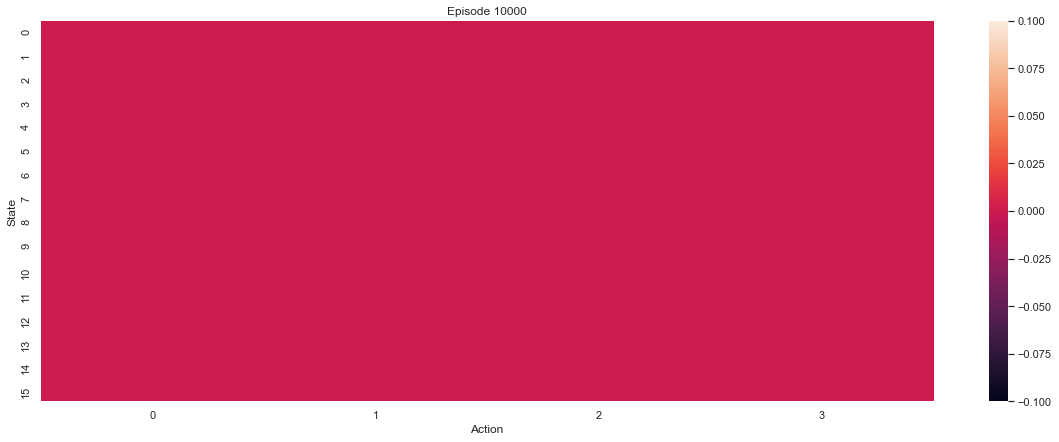

In [86]:
u7.set_environment_seed(environment=enviroment_lake, seed=42)
q_table = apply_q_learning(
    environment=enviroment_lake,
    num_episodes=10000,
    alpha=0.1,
    animate=True,
    delay_steps=1000
)

I obsere that it's all the same color which indicates that it's the same level.

<p>Very likely the $Q$-table of the previous experiment looked a little bit odd. Try to add exploration to your algorithm by adapting your $Q$-learning implementation:
    <ul>
        <li><code>I</code> $\rightarrow$ Throw a random uniform number between $0$ and $1$. 
        <li><code>II</code> $\rightarrow$ If the number is smaller than $0.1$, sample a random action.
        <li><code>III</code> $\rightarrow$ Otherwise, choose your action as usual.
    </ul>
</p>

<a name="exercise-reinforcement-learning-five"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Modify the <i>$Q$-learning</i> implementation from the previous tasks as outlined above (mark the corresponding code sections).</li>
        <li>Apply $Q$-learning on a freshly seeded <tt>FrozenLakeEnv</tt> instance for $10^4$ episodes, with $10^3$ delay steps and $\alpha{}=0.1$.</li>
        <li>Interpret the visualization of the resulting $Q$-table. What do you observe (compare with the previous visualization)?</li>
    </ul>
</div>

In [103]:
def apply_q_learning(environment: u7.FrozenLakeEnv, num_episodes: int = 1000, alpha: float = 0.1,
                    animate: bool = False, delay_steps: int = 100, threshold: float = 0.125) -> np.ndarray:
    """
    Solve specified environment by applying Q-learning.
    
    :param environment: the environment on which to apply Q-learning
    :param num_episodes: the total amount of episodes used to adapt the Q-table
    :param alpha: the learning rate to be applied by Q-learning
    :param animate: animate the Q-learning process
    :param delay_steps: the steps between each Q-table visualization (ignored if not animated)
    :param threshold: threshold for randomly sampling next action
    :return: adapted Q-table
    """
    import random
    
    q_table = np.zeros(shape=(environment.observation_space.n, environment.action_space.n))
    
    # <VI>: repeat Q-learning as long as the total amount of episodes is not yet reached.
    for episode in range(num_episodes):
        state = environment.reset()
        
        done = False
        while not done:
            rnd_num = random.uniform(0, 1)
            action = np.argmax(q_table[state]) 
            
            if rnd_num < 0.1:
                action = environment.action_space.sample()
            else:    
                action = np.argmax(q_table[state])

            # <II>: go from the current state to the next by applying chosen action.
            next_state, reward, done, info = environment.step(action)

            
            # <III>: from all possible Q-values w.r.t. the new state, select the highest.
            next_max = np.max(q_table[next_state])
            
            # <IV>: update the Q-table accordingly.
            old_value = q_table[state, action]
            new_value = (1 - alpha) * old_value + alpha * (reward + next_max)
            q_table[state, action] = new_value

            # <V>: update the next step with the current one.
            state = next_state
        
        # Optionally visualize the current Q-table.
        if animate and any(((episode + 1) % delay_steps == 0, (episode + 1) == num_episodes)):
            visualize_q_table(q_table=q_table, title=f'Episode {episode + 1}')
    
    return q_table

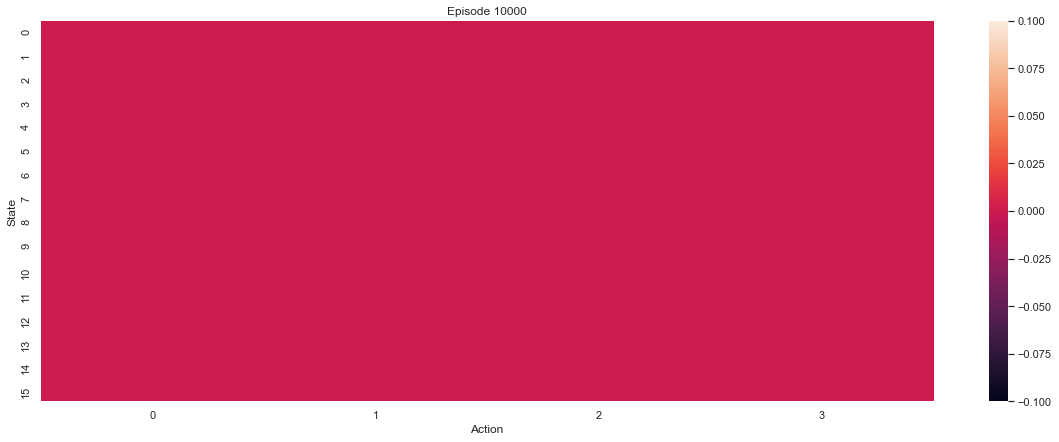

In [104]:
u7.set_environment_seed(environment=enviroment_lake, seed=42)
q_table = apply_q_learning(
    environment=enviroment_lake,
    num_episodes=10000,
    alpha=0.1,
    animate=True,
    delay_steps=1000
)


<a name="exercise-reinforcement-learning-six"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Implement a function for applying a pre-trained $Q$-table on a <tt>FrozenLakeEnv</tt> instance (like discussed during class).</li>
        <li>Conduct a $Q$-table guided search on a freshly seeded <tt>FrozenLakeEnv</tt> instance, with an animation delay of $0.1$.</li>
        <li>How many steps are necessary to reach the goal at least once and how often did an involuntary dive happen?</li>
    </ul>
</div>

In [ ]:
def apply_q_table(environment: u7.FrozenLakeEnv, q_table: np.ndarray, animate: bool = False,
                  delay: float = 0.01, max_steps: int = 1000) -> Tuple[int, int, Dict[str, Any]]:
    """
    Solve specified environment by applying specified Q-table.
    
    :param environment: the environment on which to apply Q-table guided search
    :param q_table: the Q-table used during Q-table guided search
    :param animate: animate the Q-table guided search process
    :param delay: the minimum delay in milliseconds between each rendered frame (ignored if not animated)
    :param max_steps: maximum amount of steps to perform
    :return: amount of steps performed, involuntary dives and captured frames
    """
    raise NotImplementedError(r'Exchange this error with your implementation.')

<a name="exercise-reinforcement-learning-seven"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Conduct a <i>$Q$-table guided search experiment</i> as outlined previously, using $100$ repetitions and the random seed set to $42$.</li>
        <li>Interpret the visualization (e.g. the span of the boxes) and keep the scaling of the <i>x-axis</i> in mind.</li>
        <li>In comparison with the <i>random search</i> experiment, how does the $Q$-table guided search perform? Discuss the results.</li>
    </ul>
</div>